# Understanding recurrent neural networks

In [75]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

## A first recurrent layer in Keras

In [79]:
from keras.layers import SimpleRNN

In [78]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [80]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [81]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 46s 2ms/step - loss: 0.6395 - acc: 0.6164 - val_loss: 0.5844 - val_acc: 0.6850
Epoch 2/10
20000/20000 [==============================] - 41s 2ms/step - loss: 0.4267 - acc: 0.8175 - val_loss: 0.4796 - val_acc: 0.7934
Epoch 3/10
20000/20000 [==============================] - 40s 2ms/step - loss: 0.3208 - acc: 0.8728 - val_loss: 0.3938 - val_acc: 0.8286
Epoch 4/10
20000/20000 [==============================] - 41s 2ms/step - loss: 0.2555 - acc: 0.8999 - val_loss: 0.4163 - val_acc: 0.8346
Epoch 5/10
20000/20000 [==============================] - 40s 2ms/step - loss: 0.2118 - acc: 0.9188 - val_loss: 0.3795 - val_acc: 0.8408
Epoch 6/10
20000/20000 [==============================] - 42s 2ms/step - loss: 0.1658 - acc: 0.9383 - val_loss: 0.3773 - val_acc: 0.8490
Epoch 7/10
20000/20000 [==============================] - 40s 2ms/step - loss: 0.1574 - acc: 0.9418 - val_loss: 0.3908 - val_acc:

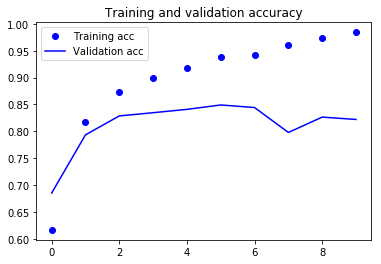

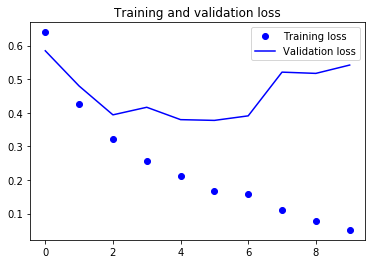

In [83]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## A concrete LSTM example in Keras

In [100]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 160s 8ms/step - loss: 0.5098 - acc: 0.7643 - val_loss: 0.3493 - val_acc: 0.8648
Epoch 2/10
20000/20000 [==============================] - 157s 8ms/step - loss: 0.2936 - acc: 0.8845 - val_loss: 0.3461 - val_acc: 0.8468
Epoch 3/10
20000/20000 [==============================] - 158s 8ms/step - loss: 0.2308 - acc: 0.9128 - val_loss: 0.2917 - val_acc: 0.8892
Epoch 4/10
20000/20000 [==============================] - 158s 8ms/step - loss: 0.1930 - acc: 0.9285 - val_loss: 0.3190 - val_acc: 0.8638
Epoch 5/10
20000/20000 [==============================] - 157s 8ms/step - loss: 0.1759 - acc: 0.9357 - val_loss: 0.2915 - val_acc: 0.8788
Epoch 6/10
20000/20000 [==============================] - 157s 8ms/step - loss: 0.1541 - acc: 0.9438 - val_loss: 0.3945 - val_acc: 0.8708
Epoch 7/10
20000/20000 [==============================] - 156s 8ms/step - loss: 0.1440 - acc: 0.9487 - val_loss: 0.4110 - v

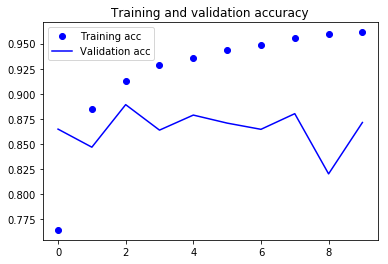

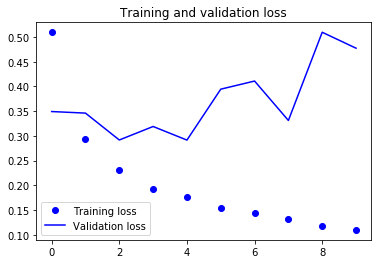

In [101]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()